1583820
76529
FreqDist({',': 77717, 'the': 76529, '.': 65876, 'a': 38106, 'and': 35576, 'of': 34123, 'to': 31937, "'": 30585, 'is': 25195, 'in': 21822, 's': 18513, '"': 17612, 'it': 16107, 'that': 15924, '-': 15595, ...})
39768
1583820
{',': 77717, 'the': 76529, '.': 65876, 'a': 38106, 'and': 35576, 'of': 34123, 'to': 31937, "'": 30585, 'is': 25195, 'in': 21822, 's': 18513, '"': 17612, 'it': 16107, 'that': 15924, '-': 15595, ')': 11781, '(': 11664, 'as': 11378, 'with': 10792, 'for': 9961, 'his': 9587, 'this': 9578, 'film': 9517, 'i': 8889, 'he': 8864, 'but': 8634, 'on': 7385, 'are': 6949, 't': 6410, 'by': 6261, 'be': 6174, 'one': 5852, 'movie': 5771, 'an': 5744, 'who': 5692, 'not': 5577, 'you': 5316, 'from': 4999, 'at': 4986, 'was': 4940, 'have': 4901, 'they': 4825, 'has': 4719, 'her': 4522, 'all': 4373, '?': 3771, 'there': 3770, 'like': 3690, 'so': 3683, 'out': 3637, 'about': 3523, 'up': 3405, 'more': 3347, 'what': 3322, 'when': 3258, 'which': 3161, 'or': 3148, 'she': 3141, 'their': 3

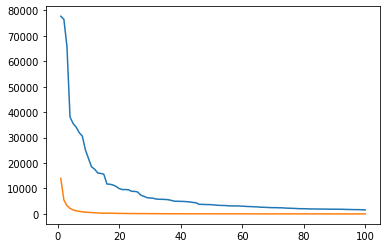

In [1]:
from ipynb.fs.full.rule_based_sentiment_analysis import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [2]:
print(len(data_samples))

6962


In [3]:
# 1 2 3 4 5 6 7 8 9 10
# fold 1 -> 1 2
# fold 2 -> 3 4
# fold 3 -> 5 6
# fold 4 -> 7 8
# fold 5 -> 9 10
# ---
# train on k - 1 folds , test on the remaining 1 fold
# 5 folds
print(labels[: 100])

['pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos']


In [51]:
# create new samples of data
data_samples, labels = create_data_label_pairs(100)
all_indexes = list(range(len(data_samples)))
shuffle_items(all_indexes)
data_samples = select_items_based_on_indexes(data_samples, all_indexes)
labels = select_items_based_on_indexes(labels, all_indexes)
# Split train and test data
split_point = int(0.8 * len(data_samples))
print(split_point)
train_data, train_labels = data_samples[: split_point], labels[: split_point]
test_data, test_labels = data_samples[split_point:], labels[split_point:]
print(len(test_data))

pos/cv000_29590.txt
pos/cv001_18431.txt
pos/cv002_15918.txt
pos/cv003_11664.txt
pos/cv004_11636.txt
pos/cv005_29443.txt
pos/cv006_15448.txt
pos/cv007_4968.txt
pos/cv008_29435.txt
pos/cv009_29592.txt
pos/cv010_29198.txt
pos/cv011_12166.txt
pos/cv012_29576.txt
pos/cv013_10159.txt
pos/cv014_13924.txt
pos/cv015_29439.txt
pos/cv016_4659.txt
pos/cv017_22464.txt
pos/cv018_20137.txt
pos/cv019_14482.txt
pos/cv020_8825.txt
pos/cv021_15838.txt
pos/cv022_12864.txt
pos/cv023_12672.txt
pos/cv024_6778.txt
pos/cv025_3108.txt
pos/cv026_29325.txt
pos/cv027_25219.txt
pos/cv028_26746.txt
pos/cv029_18643.txt
pos/cv030_21593.txt
pos/cv031_18452.txt
pos/cv032_22550.txt
pos/cv033_24444.txt
pos/cv034_29647.txt
pos/cv035_3954.txt
pos/cv036_16831.txt
pos/cv037_18510.txt
pos/cv038_9749.txt
pos/cv039_6170.txt
pos/cv040_8276.txt
pos/cv041_21113.txt
pos/cv042_10982.txt
pos/cv043_15013.txt
pos/cv044_16969.txt
pos/cv045_23923.txt
pos/cv046_10188.txt
pos/cv047_1754.txt
pos/cv048_16828.txt
pos/cv049_20471.txt
pos/cv050_

In [52]:
# Create a TF-IDF vectorizer with default settings
tfidf_vect = TfidfVectorizer()

In [53]:
# Transform the text into TF-IDF vectors
train_tfidf = tfidf_vect.fit_transform(train_data)
print(train_tfidf.shape)

(5569, 12447)


In [54]:
# Define a Linear SVM classifier
svm = LinearSVC()

In [55]:
# Fit the SVM classifier.
svm = svm.fit(train_tfidf, train_labels)

In [56]:
# Transform the test data into TF-IDF
test_tfidf = tfidf_vect.transform(test_data)

In [57]:
# Predict labels on the test TF-IDF
predicted_test = svm.predict(test_tfidf)

In [58]:
# Evaluation
print(classification_report(test_labels, predicted_test))

              precision    recall  f1-score   support

         neg       0.65      0.73      0.69       658
         pos       0.73      0.65      0.69       735

    accuracy                           0.69      1393
   macro avg       0.69      0.69      0.69      1393
weighted avg       0.69      0.69      0.69      1393



In [48]:
# Fine tune the parameters
tfidf_vect = TfidfVectorizer(ngram_range=(2, 6), analyzer='char', stop_words='english')

In [49]:
# Repeat steps similar to the above
train_tfidf = tfidf_vect.fit_transform(train_data)
svm = LinearSVC()
svm = svm.fit(train_tfidf, train_labels)
test_tfidf = tfidf_vect.transform(test_data)
predicted_test = svm.predict(test_tfidf)
print(classification_report(test_labels, predicted_test))

              precision    recall  f1-score   support

         neg       0.71      0.70      0.71       356
         pos       0.70      0.70      0.70       345

    accuracy                           0.70       701
   macro avg       0.70      0.70      0.70       701
weighted avg       0.70      0.70      0.70       701



In [50]:
# Repeat steps similar to the above
train_tfidf = tfidf_vect.fit_transform(train_data)
log_reg = LogisticRegression()
log_reg = log_reg.fit(train_tfidf, train_labels)
test_tfidf = tfidf_vect.transform(test_data)
predicted_test = log_reg.predict(test_tfidf)
print(classification_report(test_labels, predicted_test))

              precision    recall  f1-score   support

         neg       0.70      0.67      0.69       356
         pos       0.67      0.71      0.69       345

    accuracy                           0.69       701
   macro avg       0.69      0.69      0.69       701
weighted avg       0.69      0.69      0.69       701

